# Анализ оттока клиентов банка «Метанпромбанк»

Отделу маркетинга банка "Метанпромбанк" необходимо провести исследование, которое выявит маркеры клиентов, склонных к оттоку из банка. 

**Цель исследования.**
    
Провести анализ данных, при помощи которых будет разработана стратегия маркетингового взаимодействия с нестабильными клиентами.

**Задачи исследования.**

Изучение состава и распределения клиентов банка по половому, возрастному, географическому и др. признакам. 

Поиск и изучение закономерностей между значениями признаков и оттоком клиентов. Нахождение взаимосвязи между отнесением клиента к определенному сегменту и его склонностью к оттоку.

Разделение клиентов на группы по схожести признаков и поведения.

Выделение конкретной группы клиентов и конкретных характеристик клиента, которые приводят к оттоку. Формирование и проверка гипотез.

Формулировка выводов исследования и рекомендаций для отдела маркетинга.

**Исходные данные.**
    
Данные представлены в виде csv-таблицы, выгруженной из базы данных банка на конкретную дату. 
Персональных данных в таблице нет, есть информация о поле, возрасте, городе обслуживания клиента и др.

# План работы:

## 1. Загрузка и предобработка данных

Загрузка необходимых для работы библиотек, загрузка файла с данными. 

Работа с пропусками, дубликатами, приведение данных к удобному для работы формату, добавление дополнительных столбцов.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly import graph_objects as go
from matplotlib import rcParams
from scipy import stats as st
sns.set_palette('bright') 

In [ ]:
data = pd.read_csv('/datasets/bank_dataset.csv')
data

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


В датасете 10 тысяч строк, есть пропуски в данных в столбце "Balance", названия колонок лучше привести к более удобному для работы формату. 

In [ ]:
data.columns = [x.lower() for x in data.columns]
data = data.rename(columns={'userid':'user_id', 'creditcard':'credit_card'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Введем дополнительный столбец с указанием факта оттока клиента в формате "bool".

In [ ]:
data['is_churn'] = (data['churn'] == 1)
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,is_churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,True
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,False
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,True
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,False
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,False


In [ ]:
data['is_churn'].value_counts(), data['churn'].value_counts()

(False    7963
 True     2037
 Name: is_churn, dtype: int64,
 0    7963
 1    2037
 Name: churn, dtype: int64)

Рассмотрим столбец с городом проживания клиента. Введем колонки, которые отражают факт проживания клиента в формате int.

In [ ]:
data['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

In [ ]:
data['yaroslavl'] = (data['city'] == 'Ярославль')
data['rybinsk'] = (data['city'] == 'Рыбинск')
data['rostov'] = (data['city'] == 'Ростов Великий')


In [ ]:
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,is_churn,yaroslavl,rybinsk,rostov
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,True,True,False,False
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,False,False,True,False
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,True,True,False,False
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,False,True,False,False
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,False,False,True,False


In [ ]:
data['yaroslavl'] = data['yaroslavl'].astype(int)
data['rybinsk'] = data['rybinsk'].astype(int)
data['rostov'] = data['rostov'].astype(int)
data

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,is_churn,yaroslavl,rybinsk,rostov
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,True,1,0,0
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,False,0,1,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,True,1,0,0
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,False,1,0,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0,False,1,0,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0,False,1,0,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1,True,1,0,0
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1,True,0,0,1


In [ ]:
(data.query('city == "Ярославль"')['yaroslavl'].unique(), data.query('city == "Ярославль"')['rybinsk'].unique(), 
 data.query('city == "Ярославль"')['rostov'].unique())

(array([1]), array([0]), array([0]))

In [ ]:
(data.query('city == "Рыбинск"')['rybinsk'].unique(),data.query('city == "Рыбинск"')['yaroslavl'].unique(),
data.query('city == "Рыбинск"')['rostov'].unique())

(array([1]), array([0]), array([0]))

In [ ]:
(data.query('city == "Ростов Великий"')['rostov'].unique(), data.query('city == "Ростов Великий"')['yaroslavl'].unique(), 
 data.query('city == "Ростов Великий"')['rybinsk'].unique())

(array([1]), array([0]), array([0]))

Выше мы проверили, что данные в новых колонках отражены без ошибок.

In [ ]:
data['user_id'].nunique()

10000

In [ ]:
for name in data[['gender','age','objects','products','credit_card','loyalty','churn']].columns:
    display(data[name].sort_values().unique())

array(['Ж', 'М'], dtype=object)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

array([1, 2, 3, 4])

array([0, 1])

array([0, 1])

array([0, 1])

У нас данные 10 тысяч клиентов, id клиентов не повторяются. По половому признаку клиенты делятся на две группы, возраст клиентов варьируется от 18 до 92 лет. Клиенты используют от 1 до 4 различных продуктов банка, имеют в собственности от 0 до 10 объектов. Также у нас есть данные о наличии или отсутствии у клиента кредитной карты, лояльности (активности) клиента и о факте оттока клиента. Данные о финансах клиентов отражены в столбцах с балансом средств на счете на кокретную дату и с ожидаемым доходом.

In [ ]:
data[data['balance'].isna()]

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,is_churn,yaroslavl,rybinsk,rostov
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,True,1,0,0
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,False,1,0,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,False,1,0,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0,False,0,1,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0,False,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0,False,0,1,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0,False,0,1,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0,False,1,0,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0,False,1,0,0


В столбце с балансом средств на счете клинета много пропущенных значений, это 36% данных и удалять их нельзя. Оставим пока пропущенные данные в таком виде и оценим их влияние на аналитику позже.

Проверим данные на явные и неявные дубликаты.

In [ ]:
data[data.duplicated()]

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,is_churn,yaroslavl,rybinsk,rostov


In [ ]:
data[data.duplicated(subset=['score', 'city', 'gender', 'age', 'objects', 'estimated_salary'])]

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,is_churn,yaroslavl,rybinsk,rostov


В данных отсутствуют дубликаты. 

Мы провели предобработку данных, можем начать исследовательский анализ.

In [ ]:
data['gender_new'] = data['gender']

In [ ]:
data = pd.get_dummies(data, columns=['gender_new'])

In [ ]:
data

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,is_churn,yaroslavl,rybinsk,rostov,gender_new_Ж,gender_new_М
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,True,1,0,0,1,0
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,False,0,1,0,1,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,True,1,0,0,1,0
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,False,1,0,0,1,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,False,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0,False,1,0,0,0,1
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0,False,1,0,0,0,1
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1,True,1,0,0,1,0
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1,True,0,0,1,0,1


In [ ]:
data = data.rename(columns={'gender_new_Ж':'female', 'gender_new_М':'male'})
data

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,is_churn,yaroslavl,rybinsk,rostov,female,male
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,True,1,0,0,1,0
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,False,0,1,0,1,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,True,1,0,0,1,0
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,False,1,0,0,1,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,False,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0,False,1,0,0,0,1
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0,False,1,0,0,0,1
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1,True,1,0,0,1,0
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1,True,0,0,1,0,1


## 2. Исследовательский анализ данных
 

### 2.1. Анализ характеристик состава клиентов банка

Начнем анализ с изучения данных с помощью метода describe.

In [ ]:
data.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,yaroslavl,rybinsk,rostov,female,male
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.247700,0.250900,0.454300,0.545700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.431698,0.433553,0.497932,0.497932
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


В среднем у нас клиенты чуть моложе 40 лет, с рейтингом около 650, у которых баланс счета составляет порядка 199 тыс.руб. Ожидаемый доход клиента в среднем составляет около 100 тыс.руб. Клиенты в основном пользуются одним продуктом банка и владеют 5 объектами. Средние и медианные показатели почти не различаются, что означает, что в данных нет явных выбросов и распределение не скошено ни в право, ни в лево.

Рассмотрим состав клиентов более подробно.

In [ ]:
for name in data[['city','gender','objects','products','credit_card','loyalty','churn']].columns:
    pivot = data.pivot_table(index=name, values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data['user_id'].count()*100,2)
    display(pivot)

,user_id,%
city,,
Ростов Великий,2509,25.09
Рыбинск,2477,24.77
Ярославль,5014,50.14


,user_id,%
gender,,
Ж,4543,45.43
М,5457,54.57


,user_id,%
objects,,
0,413,4.13
1,1035,10.35
2,1048,10.48
3,1009,10.09
4,989,9.89
5,1012,10.12
6,967,9.67
7,1028,10.28
8,1025,10.25


,user_id,%
products,,
1,5084,50.84
2,4590,45.90
3,266,2.66
4,60,0.60


,user_id,%
credit_card,,
0,2945,29.45
1,7055,70.55


,user_id,%
loyalty,,
0,4849,48.49
1,5151,51.51


,user_id,%
churn,,
0,7963,79.63
1,2037,20.37


Географически клиенты распрделены неравномерно между тремя городами: половина клиентов из Ярославля, по 25% из Рыбинска и Ростова Великого. Мужчин в целом на 10% больше, чем женщин. Всего 3,2% пользуются более, чем двумя продуктами банка. В основном клиенты используют один проудкт (50,8%) или 2 продукта банка (45,9%). БОльшая часть клиентов (70,5%) имеют кредитную карту. Активными клиентами являются 51,5%.

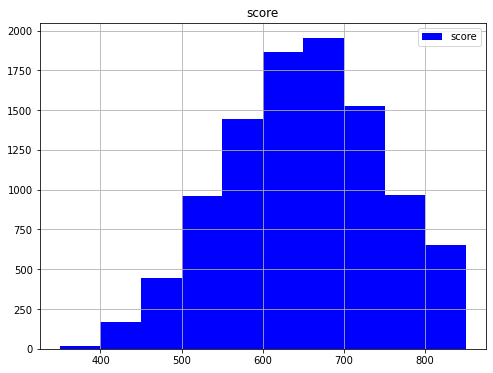

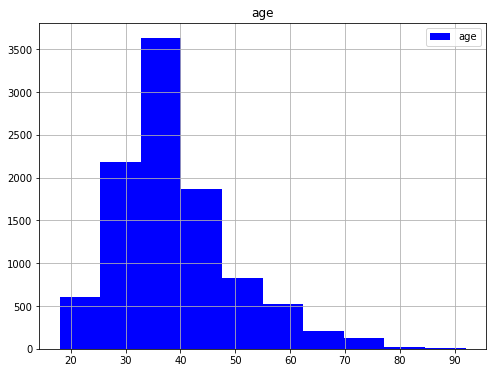

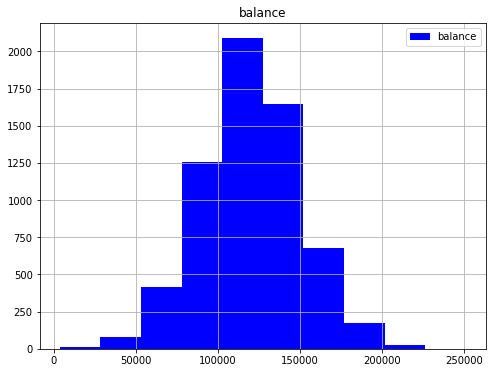

In [ ]:
for col in data[['score','age','balance']].columns:
    data.hist(column=col, bins=10, figsize=(8,6), color='blue', legend=True)
    plt.show()

Чаще всего клиенты имеют рейтинг от 600 до 700. Возраст клиента чаще всего составляет от 25 до 47 лет, баланс  счета 100-125 тыс.руб.

In [ ]:
for name in data.drop(['user_id','estimated_salary'], axis=1).columns:
    display(name)
    display(data[name].value_counts().sort_values(ascending=False)) 

'score'

850    233
678     63
655     54
667     53
705     53
      ... 
440      1
424      1
367      1
358      1
423      1
Name: score, Length: 460, dtype: int64

'city'

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

'gender'

М    5457
Ж    4543
Name: gender, dtype: int64

'age'

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: age, Length: 70, dtype: int64

'objects'

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: objects, dtype: int64

'balance'

105473.74    2
130170.82    2
132005.77    1
109724.38    1
133681.78    1
            ..
79811.72     1
134740.19    1
87609.68     1
107525.07    1
104001.38    1
Name: balance, Length: 6381, dtype: int64

'products'

1    5084
2    4590
3     266
4      60
Name: products, dtype: int64

'credit_card'

1    7055
0    2945
Name: credit_card, dtype: int64

'loyalty'

1    5151
0    4849
Name: loyalty, dtype: int64

'churn'

0    7963
1    2037
Name: churn, dtype: int64

'is_churn'

False    7963
True     2037
Name: is_churn, dtype: int64

'yaroslavl'

1    5014
0    4986
Name: yaroslavl, dtype: int64

'rybinsk'

0    7523
1    2477
Name: rybinsk, dtype: int64

'rostov'

0    7491
1    2509
Name: rostov, dtype: int64

'female'

0    5457
1    4543
Name: female, dtype: int64

'male'

1    5457
0    4543
Name: male, dtype: int64

Среди клиентов датасета 20,37% ушли в отток. Рассмотрим состав клиентов более подробно в зависимости от факта оттока. Больше всего у нас клиентов от 34 до 38 лет, т.е. работоспособного и платежеспособного возраста. 

### 2.2. Исследование влияния каждого показателя на отток клиента. 

Рассмотрим, как изменяется отток клиентов в зависимости от показателя.

In [ ]:
for name in data[['city','gender','objects','products','credit_card','loyalty']].columns:
    pivot = data.pivot_table(index=[name,'is_churn'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data['user_id'].count()*100,2)
    display(pivot)

user_id      %
city           is_churn                
Ростов Великий False        1695  16.95
               True          814   8.14
Рыбинск        False        2064  20.64
               True          413   4.13
Ярославль      False        4204  42.04
               True          810   8.10

user_id      %
gender is_churn                
Ж      False        3404  34.04
       True         1139  11.39
М      False        4559  45.59
       True          898   8.98

user_id     %
objects is_churn               
0       False         318  3.18
        True           95  0.95
1       False         803  8.03
        True          232  2.32
2       False         847  8.47
        True          201  2.01
3       False         796  7.96
        True          213  2.13
4       False         786  7.86
        True          203  2.03
5       False         803  8.03
        True          209  2.09
6       False         771  7.71
        True          196  1.96
7       False         851  8.51
        True          177  1.77
8       False         828  8.28
        True          197  1.97
9       False         771  7.71
        True          213  2.13
10      False         389  3.89
        True          101  1.01

user_id      %
products is_churn                
1        False        3675  36.75
         True         1409  14.09
2        False        4242  42.42
         True          348   3.48
3        False          46   0.46
         True          220   2.20
4        True           60   0.60

user_id      %
credit_card is_churn                
0           False        2332  23.32
            True          613   6.13
1           False        5631  56.31
            True         1424  14.24

user_id      %
loyalty is_churn                
0       False        3547  35.47
        True         1302  13.02
1       False        4416  44.16
        True          735   7.35

С первого взгляда можно заметить, что Ростов Великий показывает отток клиентов на уровне Ярославля, а ведь клиентов банка там в два раза меньше, чем в Ярославле.

Среди ушедших клиентов больше женщин, чем мужчин. В отток ушли все клиенты, использующие 4 продукта.

city


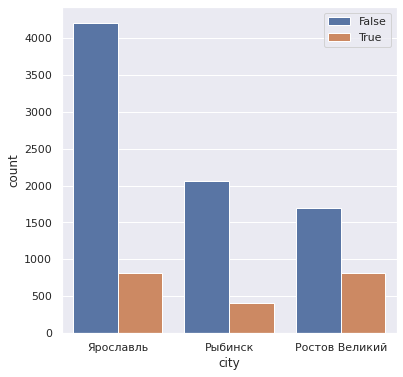

gender


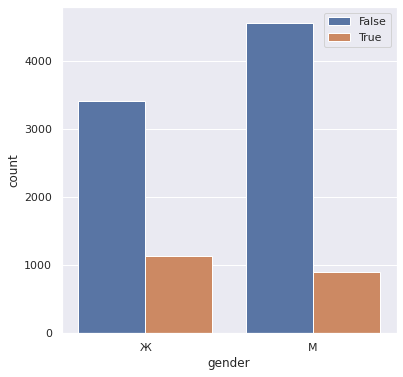

objects


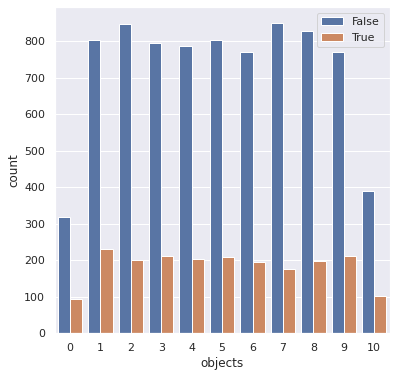

products


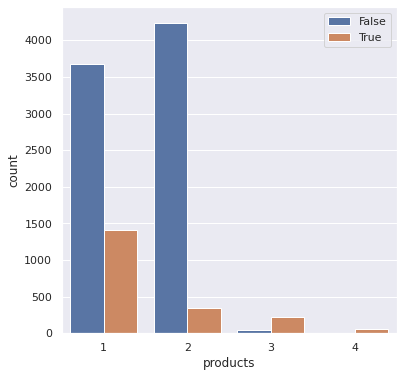

credit_card


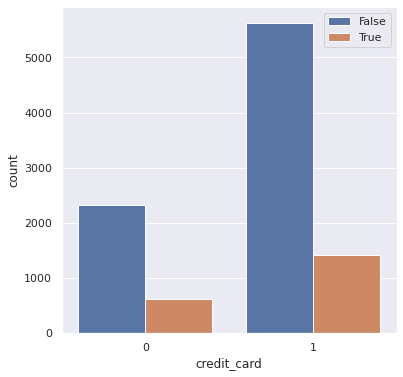

loyalty


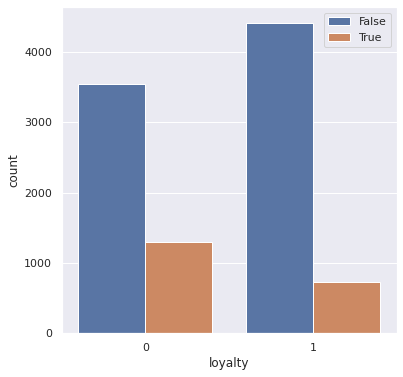

In [ ]:
for col in data[['city','gender','objects','products','credit_card','loyalty']].columns:
    print(col)
    sns.set(rc={'figure.figsize':(6,6)})
    sns.countplot(x=data[col], hue='is_churn', data=data)
    plt.legend(loc='upper right')
    plt.show()

По столбчатой диаграмме можно сделать выводы: клиенты, уходящие в отток пользуются 3-4 продуктами банка и они чаще всего неактивны, женщины показывают больший отток, чем мужчины, а жители Ростова Великого уходят из банка чаще, чем жители других городов.

Рассмотрим каждый показатель в отдельности.

#### 2.2.1. Отток клиентов в зависимости от пола.

In [ ]:
for x in data['gender'].unique():
    pivot = data.query('gender == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('gender == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


,user_id,%
is_churn,,
False,3404,74.93
True,1139,25.07


М


,user_id,%
is_churn,,
False,4559,83.54
True,898,16.46


В относительном выражении женщины показывают более высокий отток, 25% против 16,5% у мужчин.

#### 2.2.2. Отток клиентов в зависимости от города обслуживания.

In [ ]:
for x in data['city'].unique():
    pivot = data.query('city == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('city == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ярославль


,user_id,%
is_churn,,
False,4204,83.85
True,810,16.15


Рыбинск


,user_id,%
is_churn,,
False,2064,83.33
True,413,16.67


Ростов Великий


,user_id,%
is_churn,,
False,1695,67.56
True,814,32.44


В Ярославле и Рыбинске процент отттока одинаковы - на уровне 16%. А вот Ростов Великий показывает очень высокий процент оттока - 32,44%. Посмотрим на половой состав клиентов в разных городах.

In [ ]:
for x in data['city'].unique():
    pivot = data.query('city == @x').pivot_table(index=['gender'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('city == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ярославль


,user_id,%
gender,,
Ж,2261,45.09
М,2753,54.91


Рыбинск


,user_id,%
gender,,
Ж,1089,43.96
М,1388,56.04


Ростов Великий


,user_id,%
gender,,
Ж,1193,47.55
М,1316,52.45


В Ростове Великом женщин процент среди клиентов выше, чем в других городах. Это может влиять на уровень оттока в этом городе, т.к. мы выяснили, что женщины чаще склонны уходить из банка.

#### 2.2.3. Отток клиентов в зависимости от количества используемых продуктов банка.

In [ ]:
for x in data['products'].unique():
    pivot = data.query('products == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('products == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
is_churn,,
False,3675,72.29
True,1409,27.71


3


,user_id,%
is_churn,,
False,46,17.29
True,220,82.71


2


,user_id,%
is_churn,,
False,4242,92.42
True,348,7.58


4


,user_id,%
is_churn,,
True,60,100.0


Клиенты, использующие 4 продукта ушли в отток в полном составе. Клиенты с 3 продуктами показали отток 82,71% оттока. Самый низкий показатель у клинетов, использующих 2 банковских продукта.

Посмотрим на города обслуживания в разрезе количества используемых клиентами продуктов банка.

In [ ]:
for x in data['city'].unique():
    pivot = data.query('city == @x').pivot_table(index=['products'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('city == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ярославль


,user_id,%
products,,
1,2514,50.14
2,2367,47.21
3,104,2.07
4,29,0.58


Рыбинск


,user_id,%
products,,
1,1221,49.29
2,1183,47.76
3,66,2.66
4,7,0.28


Ростов Великий


,user_id,%
products,,
1,1349,53.77
2,1040,41.45
3,96,3.83
4,24,0.96


В Ростове Великом процент клиентов, использующих 3 и более продуктов банка выше, чем в двух других городах - 4,8%. Больше клиентов попали в группу риска.

Посмотрим, есть ли зависимость между полом клиента и количеством используемых продуктов.

In [ ]:
for x in data['gender'].unique():
    pivot = data.query('gender == @x').pivot_table(index=['products'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('gender == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


,user_id,%
products,,
1,2296,50.54
2,2060,45.34
3,149,3.28
4,38,0.84


М


,user_id,%
products,,
1,2788,51.09
2,2530,46.36
3,117,2.14
4,22,0.40


И мужчины и женщины чаще всего пользуются только одним продуктом. Доля женщин (4,12%), попавших в высокую группу риска оттока, почти в два раза больше, чем эта же доля у мужчин (2,54%).

#### 2.2.4. Отток клиентов в зависимости от количества объектов в собственности клиента.

In [ ]:
for x in data['objects'].unique():
    pivot = data.query('objects == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('objects == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

2


,user_id,%
is_churn,,
False,847,80.82
True,201,19.18


1


,user_id,%
is_churn,,
False,803,77.58
True,232,22.42


8


,user_id,%
is_churn,,
False,828,80.78
True,197,19.22


7


,user_id,%
is_churn,,
False,851,82.78
True,177,17.22


4


,user_id,%
is_churn,,
False,786,79.47
True,203,20.53


6


,user_id,%
is_churn,,
False,771,79.73
True,196,20.27


3


,user_id,%
is_churn,,
False,796,78.89
True,213,21.11


10


,user_id,%
is_churn,,
False,389,79.39
True,101,20.61


5


,user_id,%
is_churn,,
False,803,79.35
True,209,20.65


9


,user_id,%
is_churn,,
False,771,78.35
True,213,21.65


0


,user_id,%
is_churn,,
False,318,77.0
True,95,23.0


Клиенты, имеющие 1 объект и не имеющие объектов в собственности вообще уходят чаще остальных (22,4% и 23% оттока).

Рассмотрим, как распределены по этому показателю клиенты в зависимости от города обслуживания.

In [ ]:
for x in data['city'].unique():
    pivot = data.query('city == @x').pivot_table(index=['objects'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('city == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ярославль


,user_id,%
objects,,
0,205,4.09
1,529,10.55
2,525,10.47
3,491,9.79
4,512,10.21
5,485,9.67
6,503,10.03
7,552,11.01
8,465,9.27


Рыбинск


,user_id,%
objects,,
0,103,4.16
1,242,9.77
2,248,10.01
3,257,10.38
4,245,9.89
5,268,10.82
6,237,9.57
7,251,10.13
8,296,11.95


Ростов Великий


,user_id,%
objects,,
0,105,4.18
1,264,10.52
2,275,10.96
3,261,10.40
4,232,9.25
5,259,10.32
6,227,9.05
7,225,8.97
8,264,10.52


Здесь не видно разницы в количестве клиентов, попавших в группы с более высоким оттоком.

Посмотрим на распределение по половому признаку.

In [ ]:
for x in data['gender'].unique():
    pivot = data.query('gender == @x').pivot_table(index=['objects'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('gender == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


,user_id,%
objects,,
0,204,4.49
1,478,10.52
2,480,10.57
3,469,10.32
4,442,9.73
5,448,9.86
6,458,10.08
7,464,10.21
8,433,9.53


М


,user_id,%
objects,,
0,209,3.83
1,557,10.21
2,568,10.41
3,540,9.90
4,547,10.02
5,564,10.34
6,509,9.33
7,564,10.34
8,592,10.85


Доля женщин среди клиентов, не имеющих объектов в собственности или имеющих 1 объект, выше, чем доля мужчин. Здесь мы также видим влияние на отток гендерного признака.

#### 2.2.5. Отток клиентов в зависимости от наличия у клиента кредитной карты.

In [ ]:
for x in data['credit_card'].unique():
    pivot = data.query('credit_card == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('credit_card == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
is_churn,,
False,5631,79.82
True,1424,20.18


0


,user_id,%
is_churn,,
False,2332,79.19
True,613,20.81


Очевидно, что наличие или отсутствие у клиента кредитной карты практически никак не влияет на попадание клиента в отток.

#### 2.2.6. Отток клиентов в зависимости от активности клиента.

In [ ]:
for x in data['loyalty'].unique():
    pivot = data.query('loyalty == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('loyalty == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
is_churn,,
False,4416,85.73
True,735,14.27


0


,user_id,%
is_churn,,
False,3547,73.15
True,1302,26.85


Активные клиенты, как и ожидается, реже покидают банк (14% против 27%).

Рассмотрим активность клиентов по городам.

In [ ]:
for x in data['city'].unique():
    pivot = data.query('city == @x').pivot_table(index=['loyalty'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('city == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ярославль


,user_id,%
loyalty,,
0,2423,48.32
1,2591,51.68


Рыбинск


,user_id,%
loyalty,,
0,1165,47.03
1,1312,52.97


Ростов Великий


,user_id,%
loyalty,,
0,1261,50.26
1,1248,49.74


Только в Ростове Великом активных клиентов меньше, чем неактивных.

Оценим влияние гендерной принадлежности на активность клиентов.

In [ ]:
for x in data['gender'].unique():
    pivot = data.query('gender == @x').pivot_table(index=['loyalty'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('gender == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


,user_id,%
loyalty,,
0,2259,49.72
1,2284,50.28


М


,user_id,%
loyalty,,
0,2590,47.46
1,2867,52.54


Опять же у женщин показатели хуже, чем у мужчин. Активных клиентов среди мужчин больше (52,5% против 50,3% у женщин).

#### 2.2.7. Отток клиентов в зависимости от рейтинга, баланса счета и ожидаемого дохода.

Отток клиентов по таким показателям, как возраст, рейтинг, баланс счета, ожидаемый доход, лучше рассмотреть с помощью гистограмм. 

<Figure size 432x432 with 0 Axes>

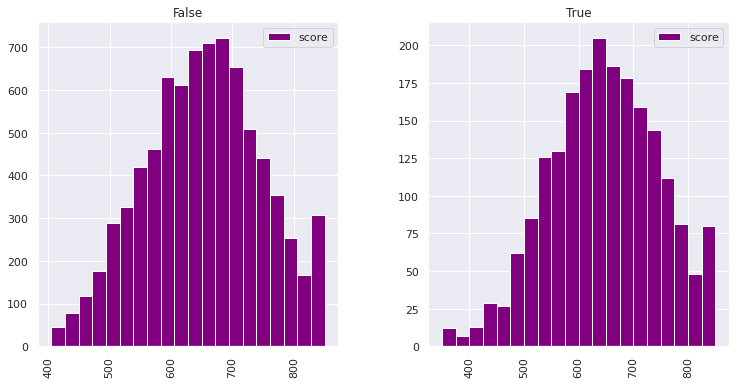

<Figure size 432x432 with 0 Axes>

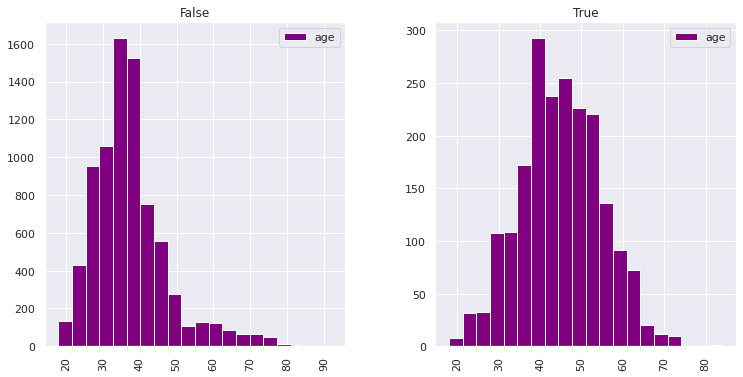

<Figure size 432x432 with 0 Axes>

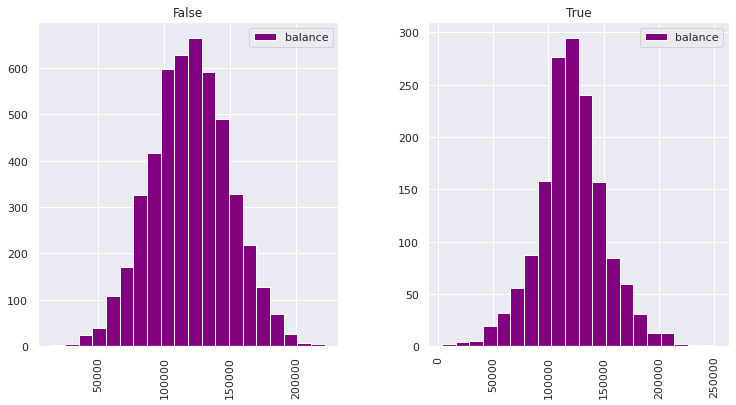

<Figure size 432x432 with 0 Axes>

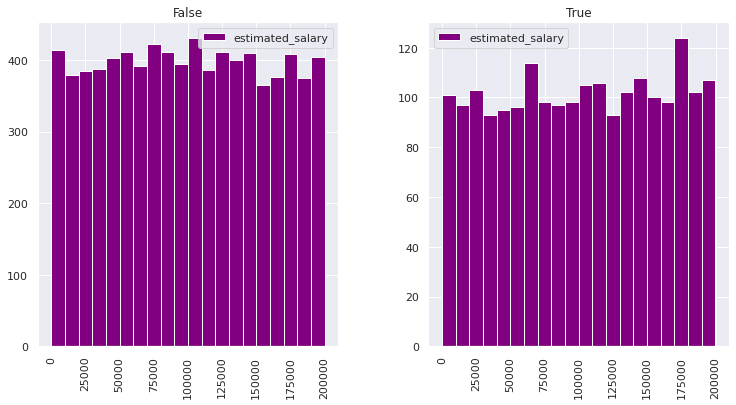

In [ ]:
for col in data[['score','age','balance','estimated_salary']].columns:
    plt.figure()
    data.hist(column=col, bins=20, by='is_churn',figsize=(12,6), color='purple', legend=True)
    plt.show()

График по показателю score


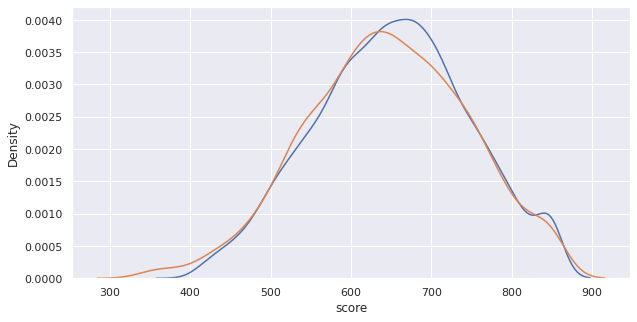

График по показателю age


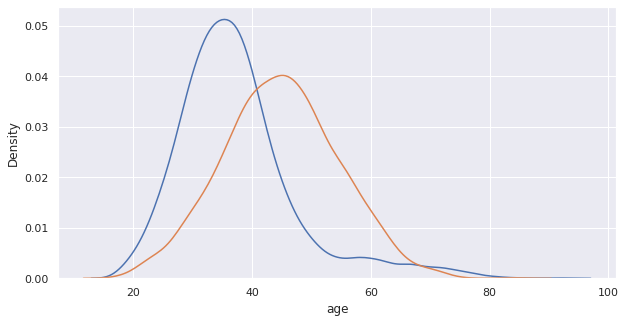

График по показателю balance


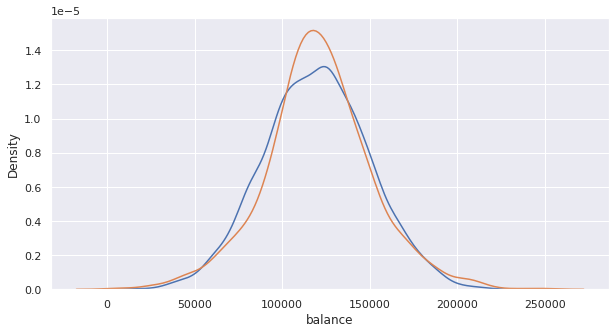

График по показателю estimated_salary


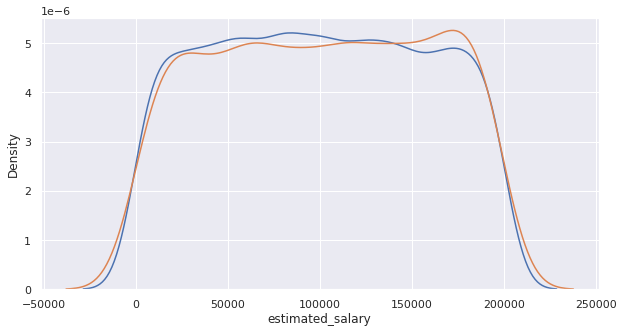

In [ ]:
for col in data[['score','age','balance','estimated_salary']].columns:
    fig, ax = plt.subplots(figsize=(10,5))
    print('График по показателю', col)
    sns.kdeplot(data.query('churn == 0')[col], ax=ax, label="клиенты остались");
    sns.kdeplot(data.query('churn == 1')[col], ax=ax, label="клиенты ушли");
    plt.show()

По рейтингу клиенты, покинувшие банк, показывают чуть менее высокие значения, чем оставшиеся клиенты. Однако разница в рейтинге некритичная.

В гистограммах, показывающих распределение по возрасту видно, что пиковые значения клиентов, попавших в оттток приходятся на возраст около 43 лет. Клиенты, оставшиеся в банке более молодые, пиковые значения гистограммы приходятся на 35-40 лет.

Нельзя сказать, что баланс средств на счете оказывает существенное влияние на факт оттока клиента. 
Гистограммы с уровнем ожидаемого дохода не указывают явно на какие-то значения, имеющие влияние на отток клиента. 

#### 2.2.8. Отток клиентов в зависимости от возраста клиента.

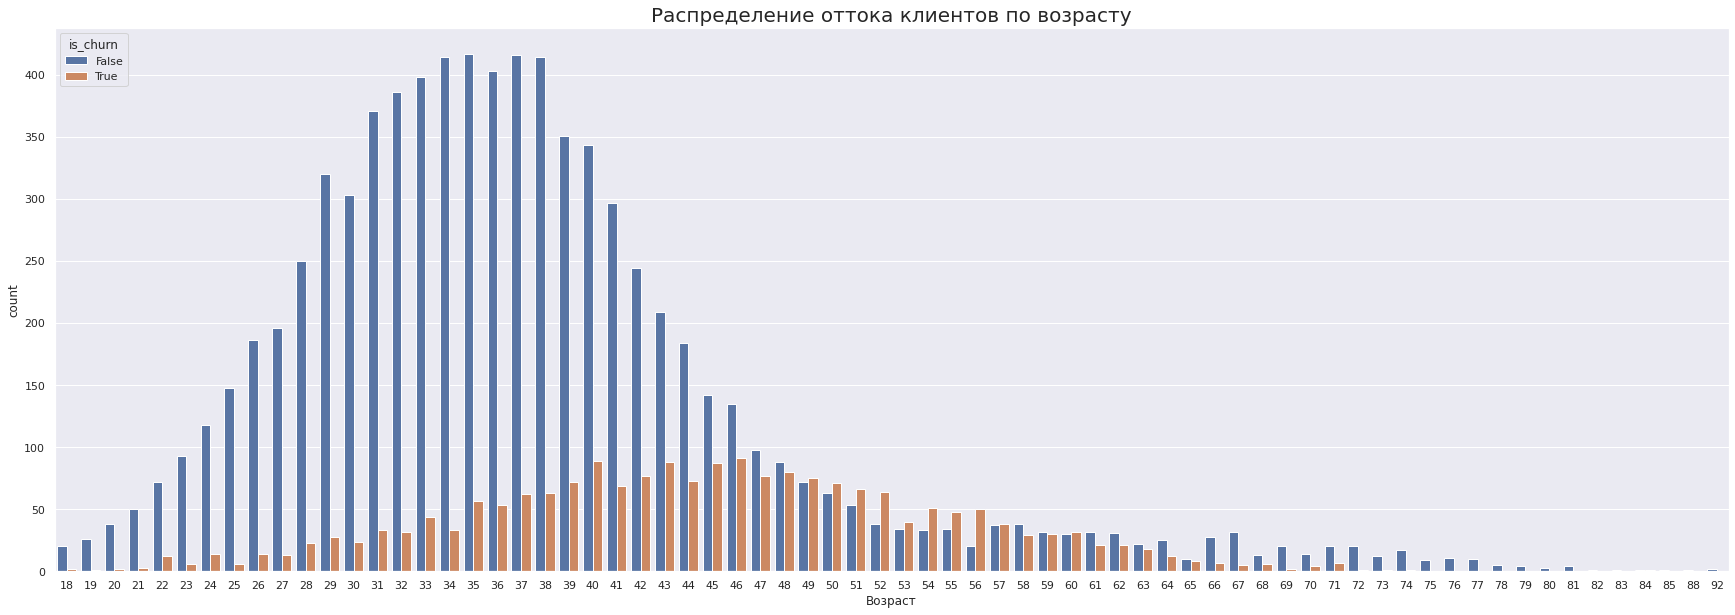

In [ ]:
size = (30, 10)
fig, ax = plt.subplots(figsize=size)
sns.countplot(ax=ax, x=data['age'], hue='is_churn', data=data)
plt.title("Распределение оттока клиентов по возрасту", fontdict = {'fontsize' : 20})
plt.xlabel('Возраст')
plt.show()

Клиенты возрастом от 43 до 65 более склонны к оттоку. Клиенты от 49 до 57 показывают самые высокие значения оттока, а самые лояльные клиенты у нас возрастом от 18 до 39 лет.

С помощью точечной диаграммы проверим, как соотносится возраст клиентов с балансом на их счете и количеством используемых продуктов банка.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


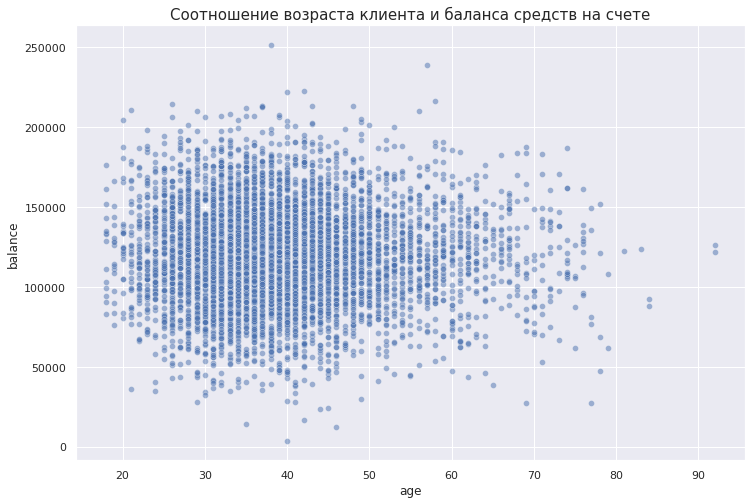

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.scatterplot(data['age'], data['balance'], alpha=0.5).set_title(
    'Соотношение возраста клиента и баланса средств на счете',fontsize=15)
plt.show()

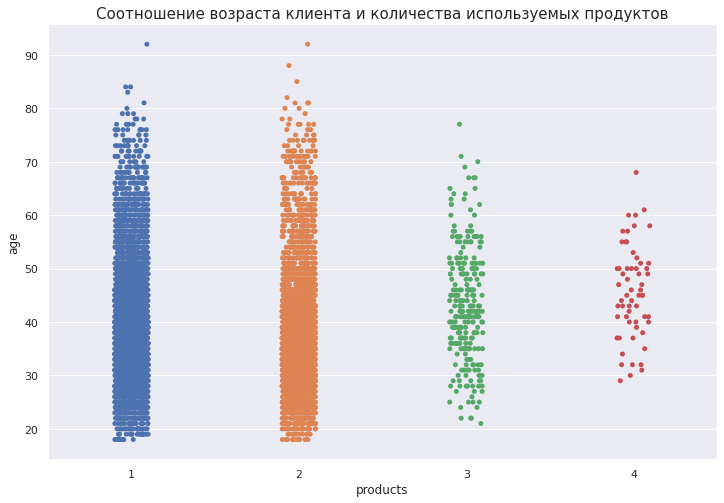

In [ ]:
ax = sns.stripplot(x="products", y="age", data=data).set_title(
    'Соотношение возраста клиента и количества используемых продуктов',fontsize=15)

Высокий баланс на счете (свыше 200 тыс.руб.) у людей не старше 58 лет. Пожилые (старше 70) люди редко пользуются более, чем двумя продуктами компании. Люди моложе 30 почти не используют 4 продукта.

### 2.3. Построение матрицы корреляций.

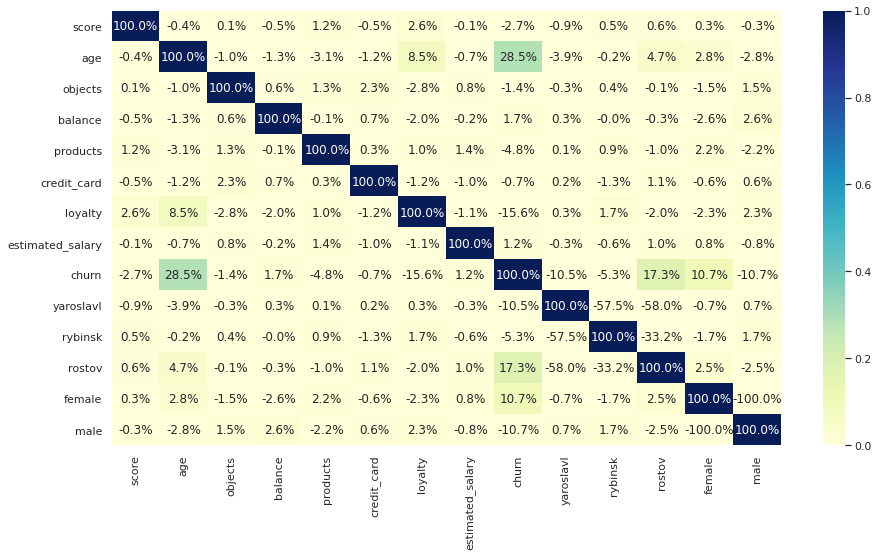

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.drop(['user_id','is_churn'], axis=1).corr(), annot = True, fmt='.1%', cmap="YlGnBu", vmin=0, vmax=1);

Повышенный положительный уровень корреляции заметен у следующих показателей: 

- возраст и отток, 

- проживание в Ростове Великом и отток

- женский пол клиента и отток.

Отрицательная корреляция видна между такими показателями:

- активность и отток,

- проживание в Ярославле и отток,

- мужской пол клиента и отток.

### 2.4. Введение дополнительных категорий по возрасту, балансу счета и ожидаемого дохода и анализ оттока в них.

#### 2.4.1. Категорирование клиентов по возрасту.

Отток клиентов повышается при достижении ими возраста 43 лет. Разделим всех клиентов на 2 категории: категория "до 42 лет" и категория "43 года и старше".

In [ ]:
cut_labels = ['до 42', 'от 43 и старше']
cut_bins = [0, 42, 92]

data['cut_age'] = pd.cut(data['age'],
                       bins=cut_bins,
                       labels=cut_labels)
data.head(10)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,is_churn,yaroslavl,rybinsk,rostov,female,male,cut_age
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,True,1,0,0,1,0,до 42
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,False,0,1,0,1,0,до 42
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,True,1,0,0,1,0,до 42
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,False,1,0,0,1,0,до 42
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,False,0,1,0,1,0,от 43 и старше
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1,True,0,1,0,0,1,от 43 и старше
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,False,1,0,0,0,1,от 43 и старше
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1,True,0,0,1,1,0,до 42
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0,False,1,0,0,0,1,от 43 и старше
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0,False,1,0,0,0,1,до 42


In [ ]:
for x in data['cut_age'].unique():
    pivot = data.query('cut_age == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('cut_age == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

до 42


,user_id,%
is_churn,,
False,6274,88.29
True,832,11.71


от 43 и старше


,user_id,%
is_churn,,
False,1689,58.36
True,1205,41.64


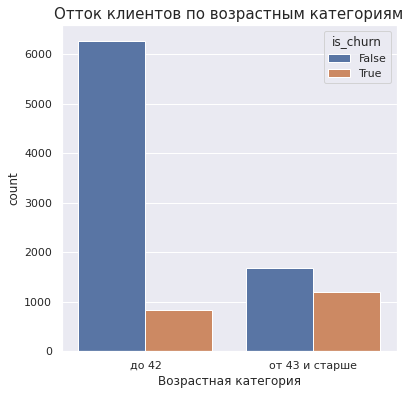

In [ ]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x=data['cut_age'], hue='is_churn', data=data)
plt.title("Отток клиентов по возрастным категориям", fontdict = {'fontsize' : 15})
plt.xlabel('Возрастная категория')
plt.show()

На столбчатой диаграмме явно видна критическая разница в оттоке клиентов в зависимости от возрастной группы. Хотя, конечно, клиентов в более старшей группе значительно меньше, чем в молодой.

Рассмотрим количество мужчин и женщин в кажой категории.

In [ ]:
for x in data['cut_age'].unique():
    pivot = data.query('cut_age == @x').pivot_table(index=['gender'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('cut_age == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

до 42


,user_id,%
gender,,
Ж,3150,44.33
М,3956,55.67


от 43 и старше


,user_id,%
gender,,
Ж,1393,48.13
М,1501,51.87


Мужчин в каждой возрастной категории больше, чем женщин. Среди наших клиентов мужчины - более молодая категория. Доля женщин в возрасте 43+ больше, чем в возрасте до 42 почти на 4%.

In [ ]:
for x in data['gender'].unique():
    pivot = data.query('gender == @x').pivot_table(index=['cut_age', 'is_churn'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('gender == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


user_id      %
cut_age        is_churn                
до 42          False        2679  58.97
               True          471  10.37
от 43 и старше False         725  15.96
               True          668  14.70

М


user_id      %
cut_age        is_churn                
до 42          False        3595  65.88
               True          361   6.62
от 43 и старше False         964  17.67
               True          537   9.84

Категория клиентов старше 43 лет женского пола - это отток почти в 48%. 

Рассмотрим, как распределены клиенты в разрезе городов и возрастных групп.

In [ ]:
for x in data['city'].unique():
    pivot = data.query('city == @x').pivot_table(index=['cut_age'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('city == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ярославль


,user_id,%
cut_age,,
до 42,3674,73.27
от 43 и старше,1340,26.73


Рыбинск


,user_id,%
cut_age,,
до 42,1767,71.34
от 43 и старше,710,28.66


Ростов Великий


,user_id,%
cut_age,,
до 42,1665,66.36
от 43 и старше,844,33.64


В Ростове Великом категория возрастом 43+ более выражена, чем в других городах.

Посмотрим на отток клиентов по городам и возрастным категориям.

In [ ]:
for x in data['city'].unique():
    pivot = data.query('city == @x').pivot_table(index=['cut_age', 'is_churn'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('city == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ярославль


user_id      %
cut_age        is_churn                
до 42          False        3342  66.65
               True          332   6.62
от 43 и старше False         862  17.19
               True          478   9.53

Рыбинск


user_id      %
cut_age        is_churn                
до 42          False        1589  64.15
               True          178   7.19
от 43 и старше False         475  19.18
               True          235   9.49

Ростов Великий


user_id      %
cut_age        is_churn                
до 42          False        1343  53.53
               True          322  12.83
от 43 и старше False         352  14.03
               True          492  19.61

Категория возрастом 43+ из Ростова Великого показывает очень высокий отток.

#### 2.4.2. Категорирование клиентов по балансу средств на счете.

Чтобы узнать, есть ли зависимость оттока клиентов от остатка на счете, разделим клиентов на 10 равных групп.

In [ ]:
bin_labels = ['q_1', 'q_2', 'q_3', 'q_4', 'q_5', 'q_6', 'q_7', 'q_8', 'q_9', 'q_10']
data['cut_balance'], bin_edges = pd.qcut(data['balance'], 
                                         q=10, 
                                         labels=bin_labels,
                                         retbins=True)
data.head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,is_churn,yaroslavl,rybinsk,rostov,female,male,cut_age,cut_balance
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,True,1,0,0,1,0,до 42,NaN
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,False,0,1,0,1,0,до 42,q_2
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,True,1,0,0,1,0,до 42,q_10
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,False,1,0,0,1,0,до 42,NaN
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,False,0,1,0,1,0,от 43 и старше,q_6


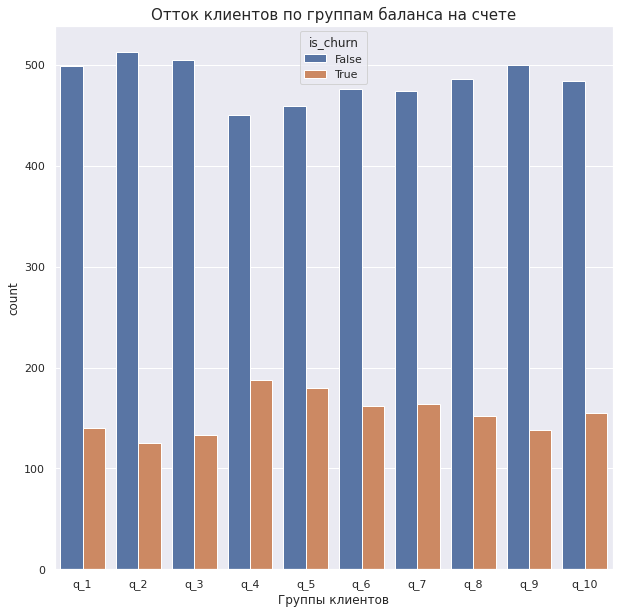

In [ ]:
sns.set(rc={'figure.figsize':(10,10)})
sns.countplot(x=data['cut_balance'], hue='is_churn', data=data)
plt.title("Отток клиентов по группам баланса на счете", fontdict = {'fontsize' : 15})
plt.xlabel('Группы клиентов')
plt.show()

На диаграмме мы видим, что, по какой-то причине, клиенты из 4 и 5 групп показывают более высокий уровень оттока, чем остальные.

Создадим дополнительный датасет без пропущенных значений и посмотрим на отток в относительном отношении по группам.

In [ ]:
data_no_na = data[~data['balance'].isna()]

Распределение средств на балансе счета у клиентов, которые остались


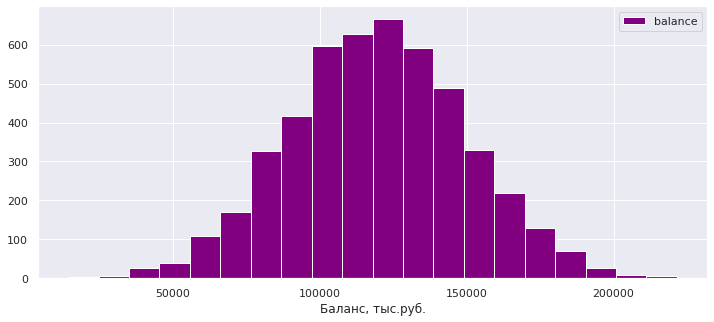

Распределение средств на балансе счета у клиентов, которые ушли в отток


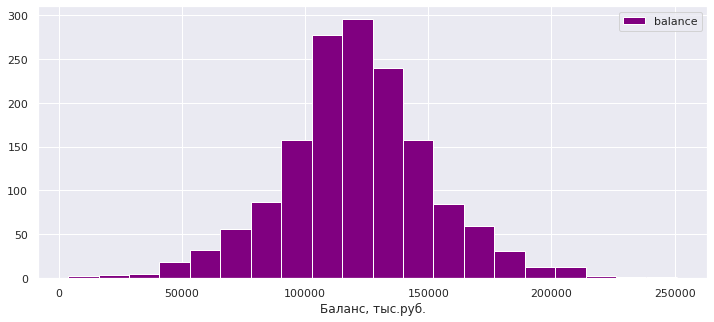

In [ ]:
for x in data_no_na['is_churn'].unique():
    data_no_na.query('is_churn == @x')['balance'].hist(bins=20, figsize=(12,5), color='purple', legend=True) 
    print(f"Распределение средств на балансе счета у клиентов, которые {'ушли в отток' if x else 'остались'}")
    plt.xlabel('Баланс, тыс.руб.')
    plt.show()

В обоих случаях распределение выглядит нормальным, пиковые значения гистограммы не сильно отличаются.

Распределение средств на балансе счета у клиентов, которые ушли в отток


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


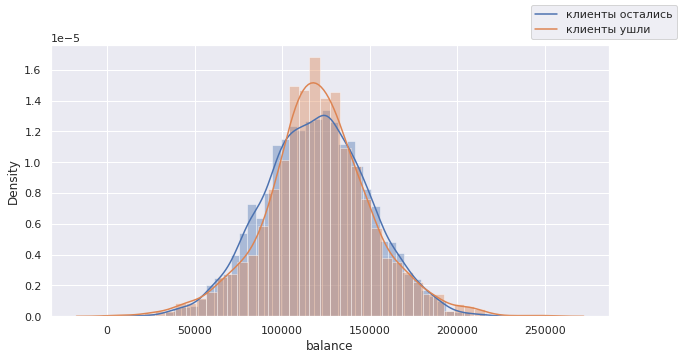

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
print(f"Распределение средств на балансе счета у клиентов, которые {'ушли в отток' if x else 'остались'}")
#data_no_na.query('is_churn == @x')['balance'].hist(bins=20, figsize=(12,5), color='purple', legend=True) 
sns.distplot(data_no_na.query('churn == 0')['balance'], ax=ax, label=True);
sns.distplot(data_no_na.query('churn == 1')['balance'], ax=ax, label=True);
#sns.set_xlabel('hhhh')
fig.legend(labels=['клиенты остались','клиенты ушли'])
plt.show()

In [ ]:
for x in data_no_na['cut_balance'].unique():
    pivot = data_no_na.query('cut_balance == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_no_na.query('cut_balance == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

q_2


,user_id,%
is_churn,,
False,513,80.41
True,125,19.59


q_10


,user_id,%
is_churn,,
False,484,75.74
True,155,24.26


q_6


,user_id,%
is_churn,,
False,476,74.61
True,162,25.39


q_5


,user_id,%
is_churn,,
False,459,71.83
True,180,28.17


q_8


,user_id,%
is_churn,,
False,486,76.18
True,152,23.82


q_7


,user_id,%
is_churn,,
False,474,74.29
True,164,25.71


q_3


,user_id,%
is_churn,,
False,505,79.15
True,133,20.85


q_1


,user_id,%
is_churn,,
False,499,78.09
True,140,21.91


q_4


,user_id,%
is_churn,,
False,450,70.53
True,188,29.47


q_9


,user_id,%
is_churn,,
False,500,78.37
True,138,21.63


In [ ]:
bin_edges

array([  3768.69 ,  81551.538,  95677.088, 104552.676, 112288.516,
       119839.69 , 127148.172, 134926.698, 144570.576, 157755.568,
       250898.09 ])

В группах 4 и 5 отток выше 28%, это клиенты с балансом от 104,5 до 119,8 тыс.руб. Этот показатель выше, чем в других группах. Однако выводы о склонности к оттоку на основе этих данных делать нельзя. У нас данные об остатках средств на конкретную дату. Для того, чтобы сделать нужные выводы, данные лучше взять за период (месяц или квартал) и сделать анализ поведения клиентов, ушедших из банка. Можно проанализировать, как с течением времени менялся баланс их счета и есть ли характерные черты (например, долгое время с нулевым остатком), указывающие на возможный уход клиента в ближайшем времени.

#### 2.4.3. Категорирование клиентов по доходу клиента.

Еще один финансовый показатель - ожидаемый доход. Эта сумма, видимо, прогнозируется на основании наблюдений за поступлениями на счет клиента. Пропусков в этих данных нет, нулевых значений тоже. Попробуем разделить клиентов на группы в зависимости от ожидаемого дохода и посмотрим, есть ли разница по оттоку в этих группах.

In [ ]:
bin_labels = ['q_1', 'q_2', 'q_3', 'q_4']
data['cut_salary'], bin_edges = pd.qcut(data['estimated_salary'], 
                                         q=4, 
                                         labels=bin_labels,
                                         retbins=True)
data.head(10)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,...,churn,is_churn,yaroslavl,rybinsk,rostov,female,male,cut_age,cut_balance,cut_salary
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,...,1,True,1,0,0,1,0,до 42,NaN,q_3
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,...,0,False,0,1,0,1,0,до 42,q_2,q_3
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,...,1,True,1,0,0,1,0,до 42,q_10,q_3
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,...,0,False,1,0,0,1,0,до 42,NaN,q_2
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,...,0,False,0,1,0,1,0,от 43 и старше,q_6,q_2
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,...,1,True,0,1,0,0,1,от 43 и старше,q_5,q_4
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,...,0,False,1,0,0,0,1,от 43 и старше,NaN,q_1
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,...,1,True,0,0,1,1,0,до 42,q_5,q_3
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,...,0,False,1,0,0,0,1,от 43 и старше,q_8,q_2
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,...,0,False,1,0,0,0,1,до 42,q_7,q_2


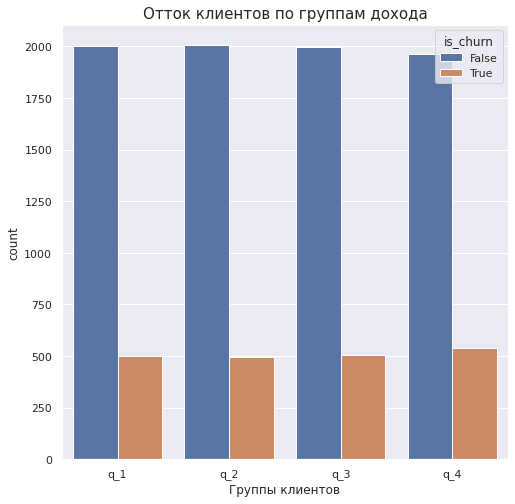

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
sns.countplot(x=data['cut_salary'], hue='is_churn', data=data)
plt.title("Отток клиентов по группам дохода", fontdict = {'fontsize' : 15})
plt.xlabel('Группы клиентов')
plt.show()

In [ ]:
for x in data['cut_salary'].unique():
    pivot = data.query('cut_salary == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('cut_salary == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

q_3


,user_id,%
is_churn,,
False,1997,79.88
True,503,20.12


q_2


,user_id,%
is_churn,,
False,2005,80.2
True,495,19.8


q_4


,user_id,%
is_churn,,
False,1961,78.44
True,539,21.56


q_1


,user_id,%
is_churn,,
False,2000,80.0
True,500,20.0


In [ ]:
bin_edges

array([1.15800000e+01, 5.10021100e+04, 1.00193915e+05, 1.49388247e+05,
       1.99992480e+05])

Теперь добавим разбивку по городам.

In [ ]:
for x in data['city'].unique():
    pivot = data.query('city == @x').pivot_table(index='cut_salary', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('city == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ярославль


,user_id,%
cut_salary,,
q_1,1246,24.85
q_2,1277,25.47
q_3,1240,24.73
q_4,1251,24.95


Рыбинск


,user_id,%
cut_salary,,
q_1,627,25.31
q_2,616,24.87
q_3,632,25.51
q_4,602,24.30


Ростов Великий


,user_id,%
cut_salary,,
q_1,627,24.99
q_2,607,24.19
q_3,628,25.03
q_4,647,25.79


Не смотря на то, что ожидаемый доход у нас варьируется от 11 рублей до почти 200 тыс.рублей, в группах разница в оттоке невелика. Можно сказать, что отток увеличивается от роста дохода клиента. Самый высокий отток в четвертой группе, где ожидаемый доход составляет от 149,4 тыс.руб. до 199,9 тыс.руб. То есть банк чаще теряет обеспеченных клиентов, что совсем не хорошо.

В городе с самым высоким оттоком в категорию с большим доходом попала самая большая часть клиентов.

### 2.5. Работа с пропущенными значениями

In [ ]:
data_na = data[data['balance'].isna()]
data_na

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,...,churn,is_churn,yaroslavl,rybinsk,rostov,female,male,cut_age,cut_balance,cut_salary
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,...,1,True,1,0,0,1,0,до 42,NaN,q_3
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,...,0,False,1,0,0,1,0,до 42,NaN,q_2
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,...,0,False,1,0,0,0,1,от 43 и старше,NaN,q_1
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,...,0,False,0,1,0,0,1,до 42,NaN,q_2
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,...,0,False,1,0,0,1,0,до 42,NaN,q_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,...,0,False,0,1,0,0,1,до 42,NaN,q_4
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,...,0,False,0,1,0,0,1,до 42,NaN,q_4
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,...,0,False,1,0,0,1,0,до 42,NaN,q_4
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,...,0,False,1,0,0,0,1,до 42,NaN,q_2


In [ ]:
data_na['city'].unique()

array(['Ярославль', 'Рыбинск'], dtype=object)

Очевидно, что все пропущенные значения в колонке "баланс" встречаются только в городах Ярославль и Рыбинск. Не будем заполнять значения или удалять их, т.к. для составления портрета пользователя, склонного к оттоку, нам нужны данные только из города Ростов Великий.

### Вывод:

На основании проведенного анализа мы можем выделить признаки и характеристики, увеличивающие вероятность оттока клиента:

1) Обслуживание в филиале банка в городе Ростов Великий. Отток клиентов тут в 2 раза выше, чем в других городах, а активных клиентов меньше, чем неактивных. Здесь доля женщин и доля клиентов с 3 и 4 продуктами банка выше, чем в других городах, а эти показатели также увеличивают риск оттока.

2) Женский пол клиента. Женщины в целом попадают в отток чаще, чем мужчины почти на 10%, а также чаще становятся неактивными клиентами. Женщин среди клиентов банка меньше, чем мужчин, но только до возраста 43 года. Чем старше возраст, тем больше доля женщин. Женщин оказалось больше среди клиентов, использующих 3 и 4 продукта банка, а это самая склонная к оттоку категория. 

3) Неактивность клиента. 27% неактивных клиентов уходят из банка, среди активных этот показатель - 14%. 

4) Возраст клиента 43 года и старше. Более молодые клиенты гораздо меньше склонны уходить из банка (11,7% против 41,6% у клиентов 43+). В Ростове Великом больше клиентов возрастом 43+, и отток там значительно выше. Также в возрасте 43+ становится больше женщин, чем мужчин, а женский пол сам по себе указывает на более высокий риск ухода.

5) Высокий ожидаемый доход. В отток, к сожалению, чаще попадают клиенты с самым высоким уровнем ожидаемого дохода, хотя разница  в оттоке между группами невелика и не превышает 1,76%.

6) Использование более 2-х продуктов банка. Клиенты, использующие максимальное количество продуктов банка (4) полностью ушли в отток. Клиенты с 3-мя продуктами попали в отток на 82,7%. 

Такие показатели, как наличие или отсутствие кредитной карты и рейтинг почти никак не влияют на вероятность оттока клиента. Количество объектов в собственности - показатель, который довольно слабо влияет на отток. Хотя анализ показал, что больше в отток уходят клиенты с одним объектом или не имеющие объектов в собственности совсем.

Баланс остатка средств на счете - сиюминутный показатель. Лучше было бы увидеть и проанализировать изменения баланса за период.

## 3. Составление портретов клиентов, которые склонны уходить из банка

Мы уже установили, что следующие показатели увеличивают факт оттока клиента: 

- женский пол

- обслуживание в Ростове Великом

- возраст старше 43 лет

- неактивность клиента

- использование 3 или 4 продуктов банка (в меньшей степени использование 1 продукта)

- высокий ожидаемый доход.

### 3.1. Город обслуживания.

Определенно, клиент, склонный к оттоку - это, чаще всего, житель Ростова Великого.
Создадим датасет, куда будет включен только город Ростов Великий и далее рассмотрим этих клиентов по другим характеристикам.

In [ ]:
data_r = data.query('rostov == 1')
for name in data_r[['gender','cut_age','products','loyalty','cut_salary','churn']].columns:
    pivot = data_r.pivot_table(index=name, values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_r['user_id'].count()*100,2)
    display(pivot)

,user_id,%
gender,,
Ж,1193,47.55
М,1316,52.45


,user_id,%
cut_age,,
до 42,1665,66.36
от 43 и старше,844,33.64


,user_id,%
products,,
1,1349,53.77
2,1040,41.45
3,96,3.83
4,24,0.96


,user_id,%
loyalty,,
0,1261,50.26
1,1248,49.74


,user_id,%
cut_salary,,
q_1,627,24.99
q_2,607,24.19
q_3,628,25.03
q_4,647,25.79


,user_id,%
churn,,
0,1695,67.56
1,814,32.44


Высокий отток - 32,44%, неактивных клиентов больше, чем активных. При этом клиентов с высоким доходом больше, чем с низким. Почти 5% клиентов используют 3 или 4 продукта банка.

In [ ]:
for x in data_r['cut_age'].unique():
    pivot = data_r.query('cut_age == @x').pivot_table(index=['is_churn'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_r.query('cut_age == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

до 42


,user_id,%
is_churn,,
False,1343,80.66
True,322,19.34


от 43 и старше


,user_id,%
is_churn,,
False,352,41.71
True,492,58.29


В Ростове Великом очень высокий отток в группе 43+, среди таких клиентов банк покинули 58,3%. 

Добавим в наш датасет уточнение по возрастной группе, теперь туда войдут только жители Ростова старше 43+. Исключим из первоначального датасета клиентов, попавших в группу высокого уровня оттока, и посмотрим, какие будут данные по оттоку. 

In [ ]:
data_target_a = data_r.query('cut_age == "от 43 и старше"')
data_new_a = data[~data['user_id'].isin(list(data_target_a['user_id']))]

In [ ]:
pivot = data_new_a.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_new_a['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,7611,83.13
True,1545,16.87


Первоначальные данные по оттоку клиентов - 20,37%. Если нам удастся повлиять на группу 43+ в Ростове, то этот показатель может быть снижен до 16,9% (предположительно).

In [ ]:
for name in data_target_a[['gender','products','loyalty','cut_salary','churn']].columns:
    pivot = data_target_a.pivot_table(index=name, values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_target_a['user_id'].count()*100,2)
    display(pivot)

,user_id,%
gender,,
Ж,431,51.07
М,413,48.93


,user_id,%
products,,
1,513,60.78
2,269,31.87
3,47,5.57
4,15,1.78


,user_id,%
loyalty,,
0,433,51.3
1,411,48.7


,user_id,%
cut_salary,,
q_1,218,25.83
q_2,207,24.53
q_3,199,23.58
q_4,220,26.07


,user_id,%
churn,,
0,352,41.71
1,492,58.29


В этой группе женщин больше, чем мужчин, 7,4% клиентов используют 3 или 4 продукта банка. Неактивных клиентов больше, чем активных, 26% - с высокими доходами.

Рассмотрим так же влияние других критических показателей на возможное изменение оттока клиентов. Сначала рассмотрим гендерный признак.

In [ ]:
for x in data_r['gender'].unique():
    pivot = data_r.query('gender == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_r.query('gender == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


,user_id,%
is_churn,,
False,745,62.45
True,448,37.55


М


,user_id,%
is_churn,,
False,950,72.19
True,366,27.81


Среди женщин Ростова отток составил 37,6%. Рассмотрим как гипотетически изменится отток, если нам удастся уговорить всех этих женщин остаться клиентками банка.

In [ ]:
data_target_g = data_r.query('gender == "Ж"')
data_new_g = data[~data['user_id'].isin(list(data_target_g['user_id']))]

In [ ]:
pivot = data_new_g.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_new_g['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,7218,81.96
True,1589,18.04


Показатель снизился, но не так, как в случае с группой 43+.

Попробуем выделить именно женщин возрастом старше 43 лет и посмотрим на показатели оттока.

In [ ]:
data_target_ag = data_r.query('gender == "Ж" and cut_age == "от 43 и старше"')
data_new_ag = data[~data['user_id'].isin(list(data_target_ag['user_id']))]

In [ ]:
pivot = data_new_ag.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_new_ag['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,7804,81.56
True,1765,18.44


Если убрать из датасета только женщин из Ростова старше 43 лет (а это 431 человек), то показатель оттока снизится не так сильно, как если убрать и мужчин 43+.

Рассмотрим группу клиентов с большим количеством используемых продуктов. Посмотрим сначала, как по распределены такие клиенты по возрастным группам.

In [ ]:
data_target_p = data_r.query('products == 3 or products == 4')
pivot = data_target_p.pivot_table(index='cut_age', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_target_p['user_id'].count()*100,2)
display(pivot)

,user_id,%
cut_age,,
до 42,58,48.33
от 43 и старше,62,51.67


Людей старше 43 лет чуть больше. 

In [ ]:
pivot = data_target_p.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_target_p['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,10,8.33
True,110,91.67


Почти 92% клиентов, подключивших 3 или 4 продукта, ушли в отток.

In [ ]:
data_target_ap = data_new_a.query('products == 3 or products == 4')
data_new_ap = data[~data['user_id'].isin(list(data_target_ap['user_id']))]

In [ ]:
pivot = data_new_ap.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_new_ap['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,7917,81.32
True,1819,18.68


Клиенты старше 43 лет с 3 и 4 продуктами действительно влияют на общий отток клиентов. Если убрать их из датасета, то отток снижается почти на 2%.

Рассмотрим Ростов по показателю активности клиентов.

In [ ]:
for x in data_r['loyalty'].unique():
    pivot = data_r.query('loyalty == @x').pivot_table(index=['is_churn'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_r.query('loyalty == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

0


,user_id,%
is_churn,,
False,743,58.92
True,518,41.08


1


,user_id,%
is_churn,,
False,952,76.28
True,296,23.72


41,1% неактивных ростовских клиентов покинули банк.

Выделим неактивных клиентов в отдельную категорию.

In [ ]:
data_target_l = data_r.query('loyalty == 0')
for x in data_target_l['cut_age'].unique():
    pivot = data_target_l.query('cut_age == @x').pivot_table(index=['is_churn'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_target_l.query('cut_age == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

до 42


,user_id,%
is_churn,,
False,628,75.85
True,200,24.15


от 43 и старше


,user_id,%
is_churn,,
False,115,26.56
True,318,73.44


Влияние возрастного признака очень сильно. Неактивность клиента старше 43 лет означает, что он, скорее всего, решил сменить банк обслуживания.

In [ ]:
data_target_lp = data_target_l.query('products == 3 or products == 4')
pivot = data_target_lp.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_target_lp['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,4,5.8
True,65,94.2


А неактивность вкупе с большим количеством продуктов - это, за редким исключением, потерянный клиент. 

Рассмотрим неактивных клиентов старше 43, выделим их в отдельную группу, исключим из датасета и посмотрим, изменится ли показатель общего оттока.

In [ ]:
data_target_al = data_target_a.query('loyalty == 0')
data_new_al = data[~data['user_id'].isin(list(data_target_al['user_id']))]
pivot = data_new_al.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_new_al['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,7848,82.03
True,1719,17.97


При таком подходе отток клиентов снижается на 2,4%. 

Попробуем добавить сюда гендерный признак, рассчитаем отток, исключив только ростовских неактивных клиенток старше 43 лет.

In [ ]:
data_target_alg = data_target_ag.query('loyalty == 0')
data_new_alg = data[~data['user_id'].isin(list(data_target_alg['user_id']))]
pivot = data_new_alg.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_new_alg['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,7905,80.94
True,1861,19.06


Показатель ухудшился, мужчины из этой группы тоже склонны уходить из банка, поэтому исключить их из группы высокого риска оттока нельзя.

Посмотрим на показатель оттока у группы риска - Ростов, неактивный клиент возрастом 43+.

In [ ]:
pivot = data_target_al.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_target_al['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,115,26.56
True,318,73.44


73,44% клиентов из этой группы ушли в отток. 

In [ ]:
pivot = data_target_al.pivot_table(index='gender', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_target_al['user_id'].count()*100,2)
display(pivot)

,user_id,%
gender,,
Ж,234,54.04
М,199,45.96


In [ ]:
for x in data_target_al['gender'].unique():
    pivot = data_target_al.query('gender == @x').pivot_table(index=['is_churn'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_target_al.query('gender == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

М


,user_id,%
is_churn,,
False,57,28.64
True,142,71.36


Ж


,user_id,%
is_churn,,
False,58,24.79
True,176,75.21


В этой группе 234 женщины и 199 мужчин, это подтверждает выводы о том, что женщины в целом чаще склонны уходить. Процент оттока у женщин немного выше. 

### 3.2. Возрастная категория и пол.

Показатели оттока в зависимости от возрастной категории у нас 11,7% в группе до 42 лет и 41,6% в группе 43+. В целом женщины уходят из банка чаще, чем мужчины на 8,6%. Добавим гендерный признак к возрастному..

In [ ]:
data_old = data.query('cut_age == "от 43 и старше"')
data_young = data.query('cut_age == "до 42"')

In [ ]:
for x in data_young['gender'].unique():
    pivot = data_young.query('gender == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_young.query('gender == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


,user_id,%
is_churn,,
False,2679,85.05
True,471,14.95


М


,user_id,%
is_churn,,
False,3595,90.87
True,361,9.13


In [ ]:
for x in data_old['gender'].unique():
    pivot = data_old.query('gender == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_old.query('gender == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


,user_id,%
is_churn,,
False,725,52.05
True,668,47.95


М


,user_id,%
is_churn,,
False,964,64.22
True,537,35.78


Женщины уходят чаще в обеих группах, но в группе 43+ доля оттока у женщин составила 48%.

### 3.3. Количество подключенных продуктов банка.

Клиенты, использующие 4 продукта ушли в отток в полном составе, клиенты с 3 продуктами показали отток 82,71% оттока. Клиенты с одним продуктом банка имеют отток в 27,7%. Самый низкий показатель у клинетов, использующих 2 банковских продукта - 7,6%.

Рассмотрим количество продуктов в разрезе других показателей.

In [ ]:
for x in data['products'].unique():
    pivot = data.query('products == @x').pivot_table(index=['gender'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('products == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
gender,,
Ж,2296,45.16
М,2788,54.84


3


,user_id,%
gender,,
Ж,149,56.02
М,117,43.98


2


,user_id,%
gender,,
Ж,2060,44.88
М,2530,55.12


4


,user_id,%
gender,,
Ж,38,63.33
М,22,36.67


Категория с оттоком в 100% - клиенты с 4 продуктами - имеет самый высокий процент женщин 63,3. 

In [ ]:
data_34p = data.query('products == 3 or products == 4')
data_new_34p = data[~data['user_id'].isin(list(data_34p['user_id']))]
data_34p['user_id'].count()

326

In [ ]:
pivot = data_34p.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_34p['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,46,14.11
True,280,85.89


In [ ]:
pivot = data_new_34p.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_new_34p['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,7917,81.84
True,1757,18.16


При исключении клиентов с 3 и 4 продуктами общий отток снижается на 2.2%.

Большое количество продуктов постоянно сопряжено с низкой активностью и крайне высоким оттоком клиентов. У меня нет точных данных, но могу предположить, что подключение к 3 и 4 продуктам проводилось в рамках стимулирующей рекламной кампании. Клиенты, воспользовавшись предложением и получив от него выгоду, затем уходили из банка. Можно с уверенностью утверждать, что та рекламная кампания не удалась. 

In [ ]:
for x in data['products'].unique():
    pivot = data.query('products == @x').pivot_table(index=['cut_age'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('products == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
cut_age,,
до 42,3436,67.58
от 43 и старше,1648,32.42


3


,user_id,%
cut_age,,
до 42,139,52.26
от 43 и старше,127,47.74


2


,user_id,%
cut_age,,
до 42,3510,76.47
от 43 и старше,1080,23.53


4


,user_id,%
cut_age,,
до 42,21,35.0
от 43 и старше,39,65.0


Группа 2 продукта, где низкий отток  - это в основном, молодые люди (76,5%).

Рассмотрим отток по количеству продуктов в группе 43+.

In [ ]:
for x in data_old['products'].unique():
    pivot = data_old.query('products == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_old.query('products == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
is_churn,,
False,801,48.6
True,847,51.4


2


,user_id,%
is_churn,,
False,883,81.76
True,197,18.24


4


,user_id,%
is_churn,,
True,39,100.0


3


,user_id,%
is_churn,,
False,5,3.94
True,122,96.06


3 и 4 продукта - отток в 96% и 100% соответственно, но эти показатели и в общем высоки. А вот в группе с 2 продуктами отток 18,2% (в общем 7,6%), в группе с 1 продуктов 51,4 (в общем 27,7%).

In [ ]:
for x in data_young['products'].unique():
    pivot = data_young.query('products == @x').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_young.query('products == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
is_churn,,
False,2874,83.64
True,562,16.36


3


,user_id,%
is_churn,,
False,41,29.5
True,98,70.5


2


,user_id,%
is_churn,,
False,3359,95.7
True,151,4.3


4


,user_id,%
is_churn,,
True,21,100.0


Определенно, возраст клиента здесь решающий фактор. У молодых клиентов отток гораздо ниже по всем группам, кроме группы с 4 продуктами.

Теперь рассмотрим отток по количеству продуктов в группе старше 43 лет сначала у женщин, а затем у мужчин.

In [ ]:
for x in data_old['products'].unique():
    pivot = data_old.query('products == @x and female == 1').pivot_table(
        index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_old.query('products == @x and female == 1')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
is_churn,,
False,334,42.44
True,453,57.56


2


,user_id,%
is_churn,,
False,390,76.92
True,117,23.08


4


,user_id,%
is_churn,,
True,23,100.0


3


,user_id,%
is_churn,,
False,1,1.32
True,75,98.68


In [ ]:
for x in data_old['products'].unique():
    pivot = data_old.query('products == @x and male == 1').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_old.query('products == @x and male == 1')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
is_churn,,
False,467,54.24
True,394,45.76


2


,user_id,%
is_churn,,
False,493,86.04
True,80,13.96


4


,user_id,%
is_churn,,
True,16,100.0


3


,user_id,%
is_churn,,
False,4,7.84
True,47,92.16


Женский пол в оттоке значительно опережает мужской, в группах с 1 и 2 продуктами отрыв составил около 10%.

In [ ]:
data_old_f_p1 = data_old.query('products == 1 and female == 1')
data_old_f_p1['user_id'].count()

787

In [ ]:
data_not_old_f_p1 = data[~data['user_id'].isin(list(data_old_f_p1['user_id']))]
pivot = data_not_old_f_p1.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_not_old_f_p1['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,7629,82.81
True,1584,17.19


Если бы женщины старше 43 лет, подключившие один продукт банка остались нашими клиентками, то отток был бы ниже на 3,18%. У нас 787 таких клиенток, отток в их группе составил 57,6%.

Группа клиентов с 4 продуктами - это однозначно отток, независимо от пола и возраста. Группа с 3 продуктами показывает тоже очень высокий отток, при этом у женщин выше, чем у мужчин, и у старшей группы больше, чем у молодой. Таких клиентов мало - 326 человек, но они дали нам 2,2% общего оттока.

### 3.4. Активность клиентов.

Активность клиентов - еще один важный показатель. Активных клиентов в целом у нас 51,5%, неактивных - 48,5%.  Активные клиенты реже покидают банк (14% против 27% у неактивных). Активных клиентов среди мужчин больше (52,5% против 50,3% у женщин). Рассмотрим, как меняется отток клиентов в связи с активностью и  другими признаками. 

Рассмотрим показатели активности у двух возрастных групп.

In [ ]:
for x in data['cut_age'].unique():
    pivot = data.query('cut_age == @x').pivot_table(index=['loyalty'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data.query('cut_age == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

до 42


,user_id,%
loyalty,,
0,3546,49.9
1,3560,50.1


от 43 и старше


,user_id,%
loyalty,,
0,1303,45.02
1,1591,54.98


Интересно, что в группе 43+ доля активных клиентов выше, чем в группе до 42 лет на 5%. Рассмотрим активность по возарстному и половому показателям.

In [ ]:
for x in data_young['gender'].unique():
    pivot = data_young.query('gender == @x').pivot_table(index=['loyalty'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_young.query('gender == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


,user_id,%
loyalty,,
0,1610,51.11
1,1540,48.89


М


,user_id,%
loyalty,,
0,1936,48.94
1,2020,51.06


Среди молодых женщин активных меньше, чем неактивных. У молодых мужчин - наоборот.

In [ ]:
for x in data_old['gender'].unique():
    pivot = data_old.query('gender == @x').pivot_table(index=['loyalty'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_old.query('gender == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


,user_id,%
loyalty,,
0,649,46.59
1,744,53.41


М


,user_id,%
loyalty,,
0,654,43.57
1,847,56.43


В группе 43+ и среди мужчин и среди женщин активных клиентов больше.

In [ ]:
for x in data_old['loyalty'].unique():
    pivot = data_old.query('loyalty == @x').pivot_table(index=['is_churn'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_old.query('loyalty == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
is_churn,,
False,1164,73.16
True,427,26.84


0


,user_id,%
is_churn,,
False,525,40.29
True,778,59.71


In [ ]:
for x in data_young['loyalty'].unique():
    pivot = data_young.query('loyalty == @x').pivot_table(index=['is_churn'], values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_young.query('loyalty == @x')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
is_churn,,
False,3252,91.35
True,308,8.65


0


,user_id,%
is_churn,,
False,3022,85.22
True,524,14.78


В молодой группе у неактивных клиентов отток, конечно, выше, чем у активных, но разница не такая, как в группе 43+. В старшей группе неактивные клиенты показали отток в 59,7% против 26,8 у активных. Разница больше, чем в два раза позволяет сделать вывод, что для клиентов старше 43 лет активность - это показатель, серьезно влияющий на вероятность оттока.

In [ ]:
for x in data_old['products'].unique():
    pivot = data_old.query('products == @x and loyalty == 0').pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_old.query('products == @x and loyalty == 0')['user_id'].count()*100,2)
    print(x)
    display(pivot)

1


,user_id,%
is_churn,,
False,248,30.47
True,566,69.53


2


,user_id,%
is_churn,,
False,277,70.48
True,116,29.52


4


,user_id,%
is_churn,,
True,21,100.0


3


,user_id,%
is_churn,,
True,75,100.0


Неактивные клиенты старше 43 лет c 1 продуктом показывают отток почти в 70%. 

In [ ]:
for x in data_old['gender'].unique():
    pivot = data_old.query('gender == @x and loyalty == 0').pivot_table(index='is_churn', values='user_id', aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_old.query('gender == @x and loyalty == 0')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


,user_id,%
is_churn,,
False,219,33.74
True,430,66.26


М


,user_id,%
is_churn,,
False,306,46.79
True,348,53.21


Неактивные клиенты старше 43 лет обоего пола показывают высокий отток.

In [ ]:
for x in data_old['gender'].unique():
    pivot = data_old.query('gender == @x and loyalty == 0 and products == 1').pivot_table(index='is_churn', values='user_id', aggfunc='count')
    pivot['%'] = round(pivot['user_id']/data_old.query('gender == @x and loyalty == 0 and products == 1')['user_id'].count()*100,2)
    print(x)
    display(pivot)

Ж


,user_id,%
is_churn,,
False,100,24.88
True,302,75.12


М


,user_id,%
is_churn,,
False,148,35.92
True,264,64.08


Оба пола в группе неактивных клиентов старше 43 лет с одним продуктом показывают высокий отток, но у женщин эта цифра выше.

In [ ]:
data_old.query('female == 1 and loyalty == 0 and products == 1')['user_id'].count()

402

In [ ]:
data_old.query('male == 1 and loyalty == 0 and products == 1')['user_id'].count()

412

In [ ]:
data_lp1 = data_old.query('loyalty == 0 and products == 1')
data_new_lp1 = data[~data['user_id'].isin(list(data_lp1['user_id']))]
pivot = data_new_lp1.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_new_lp1['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,7715,83.99
True,1471,16.01


In [ ]:
pivot = data_lp1.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_lp1['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,248,30.47
True,566,69.53


Клиенты возрастом 43 и старше, неактивные и с одним продуктом банка ответственны за 4,36% оттока. 

In [ ]:
data_lp1 = data_old.query('female == 1 and loyalty == 0 and products == 1')
data_new_lp1 = data[~data['user_id'].isin(list(data_lp1['user_id']))]
pivot = data_new_lp1.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_new_lp1['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,7863,81.92
True,1735,18.08


In [ ]:
data_lp1 = data_old.query('male == 1 and loyalty == 0 and products == 1')
data_new_lp1 = data[~data['user_id'].isin(list(data_lp1['user_id']))]
pivot = data_new_lp1.pivot_table(index='is_churn', values=['user_id'], aggfunc='count')
pivot['%'] = round(pivot['user_id']/data_new_lp1['user_id'].count()*100,2)
display(pivot)

,user_id,%
is_churn,,
False,7815,81.51
True,1773,18.49


Исключение из датасета только женщин или только мужчин из этой группы не дает такого большого эффекта снижения оттока, как исключение обоих полов. Значит, это будет группа и мужчин и женщин, которые являются неактивными клиента, возрастом 43 года и старше, подключенные только к 1 продукту банка.

### Вывод.


Можно выделить следующие группы клиентов высокого уровня оттока:

1) Неактивный клиент, возрастом 43 года и старше, проживающий в Ростове Великом, в 73% случаев из банка уйдет. Это и есть группа клиентов, склонная чаще всего к оттоку.

2) Клиенты, подключившие 3 или 4 продукта банка могут быть объединены в одну группу с рекордным оттоком в 86,9%. Группа клиентов с 4 продуктами - это отток в 100%. Всего таких клиентов 326 человек, но они дали нам 2,2% общего оттока.

3) Неактивные клиенты старше 43 лет, подключившие один продукт банка, которых у нас 814 человек, показывают отток в  69,5%. Причем у женщин этой группы отток составил 75,1%, а у мужчин 64,1%.

## 4. Проверка статистических гипотез





### 4.1. Гипотеза № 1: Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.

Сначала проведем проверку распределения на нормальность с помощью критерия Шапиро-Уилка.
Проверим методом st.shapiro(x), можно ли считать суммы ожидамого дохода клиентов нормально распределённой величиной.

Нулевая гипотеза: данные распределены нормально.

Альтернативная гипотеза: распределение ненормально.

In [ ]:
churn = data.query('churn == 1')['estimated_salary']
not_churn = data.query('churn == 0')['estimated_salary']

In [ ]:
alpha = 0.05

results = st.shapiro(churn) 
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормально')
  

p-значение:  4.594104044877579e-25
Отвергаем нулевую гипотезу: распределение не нормально


In [ ]:
alpha = 0.05

results = st.shapiro(not_churn) 
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально') 
  
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормально')
    

p-значение:  3.8115318229635024e-43
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


В обоих случаях данные распределены ненормально.  
В случае, когда в данных есть большие (по сравнению с нормальным распределением) выбросы, алгебраические метрики работают плохо и выбивающееся значение существенно влияет на результат.

Для оценки наших данных о доходах клиентов на различия лучше подойдет непараметрический тест. Применим непараметрический тест Уилкоксона-Манна-Уитни.

Нулевая гипотеза: доходы второй группы (тех, кто остался) больше, чем у тех, кто ушел.

Альтернативная гипотеза: между доходами групп нет значимой разницы.

In [ ]:
alpha = 0.01 

results = st.mannwhitneyu(churn, not_churn, True, 'less')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
      print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.886475899493893
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Нет оснований утверждать, что существует разница в доходах между оставшимися и ушедшими клиентами.

### 4.2. Гипотеза №2: Проверка гипотезы различия баланса счета у клиентов, которые ушли и у клиентов, которые остались.

Нулевая гипотеза: баланс счета у двух групп (тех, кто ушел, и тех, кто остался) не различается.

Альтернативная гипотеза: баланс счета у двух групп различается.

Сначала нужно проверить, нормально ли распределение данных в наших выборках.

Нулевая гипотеза: данные распределены нормально.

Альтернативная гипотеза: распределение ненормально.

In [ ]:
churn = data_no_na.query('churn == 1')['balance']
not_churn = data_no_na.query('churn == 0')['balance']

In [ ]:
alpha = 0.05

results = st.shapiro(churn) 
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормально')
  

p-значение:  1.0646013848258917e-08
Отвергаем нулевую гипотезу: распределение не нормально


In [ ]:
alpha = 0.05

results = st.shapiro(not_churn) 
p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
    
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормально')
  

p-значение:  0.8506813049316406
Не получилось отвергнуть нулевую гипотезу, распределение нормально


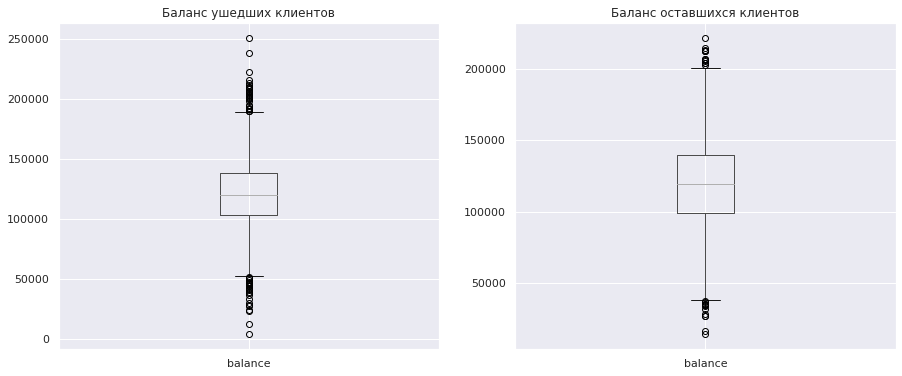

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,6))

data_no_na.query('churn == 1').boxplot('balance', ax=axes[0])
axes[0].set_title('Баланс ушедших клиентов')

data_no_na.query('churn == 0').boxplot('balance', ax=axes[1])
axes[1].set_title('Баланс оставшихся клиентов')

plt.show()

In [ ]:
churn.describe()

count      1537.000000
mean     120746.971132
std       30555.192802
min        3768.690000
25%      103700.690000
50%      119948.090000
75%      137986.580000
max      250898.090000
Name: balance, dtype: float64

In [ ]:
not_churn.describe()

count      4846.000000
mean     119535.864270
std       29944.927372
min       14262.800000
25%       99118.230000
50%      119791.215000
75%      139747.397500
max      221532.800000
Name: balance, dtype: float64

В данных о балансе клиентов, попавших в отток, действительно, больше выбросов, чем у оставшихся клиентов. Так как в одной из выборок распределение ненормально, для сравнения применим непараметрический тест Уилкоксона-Манна-Уитни.

In [ ]:
alpha = 0.01 

results = st.mannwhitneyu(churn, not_churn, True, 'two-sided')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')

else:
      print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.22150885555919375
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Не удалось доказать различие между суммой баланса на счетах оставшихся и ушедших клиентов. 

## 5. Выводы и рекомендации

Общие выводы по проведенному исследованию. 

Рекомендации для отдела маркетинга по стратегии взаимодействия со склонными к оттоку клиентами и их удержания. Важные принципы стратегии и примеры ее реализации в виде определённых маркетинговых действий.

### Выводы

Проанализировав данные по оттоку клиентов в зависимости от имеющихся показателей, нам удалось выявить характеристики, особенно сильно повышающие вероятность оттока клиента. Это женский пол, возраст 43 года и старше, неактивность клиента, проживание в Ростове Великом, подключение к трем, четырем и одному продукту банка.

Остальные имеющиеся показатели не оказывают существенного влияния на вероятность оттока.

Возраст для вероятности оттока важнее, чем принадлежность к женскому полу, хоть женщины и чаще уходят в отток. Активность клиента - очень важный показатель, неактивные клиенты уходят гораздо чаще. Клиенты 43+ чаще бывают активными. Женщины (особенно молодые) чаще становятся неактивными клиентами банка. Ростов Великий - здесь показатель оттока выше, чем в других городах. 

Мы выделили 3 группы наиболее высокого оттока:

1) Неактивный клиент, возрастом 43 года и старше, проживающий в Ростове Великом, в 73% случаев из банка уйдет. Это и есть группа клиентов, склонная чаще всего к оттоку.

2) Клиенты, подключившие 3 или 4 продукта банка могут быть объединены в одну группу с рекордным оттоком в 86,9%. Группа клиентов с 4 продуктами - это отток в 100%. Всего таких клиентов 326 человек, но они дали нам 2,2% общего оттока.

3) Неактивные клиенты старше 43 лет, подключившие один продукт банка, которых у нас 814 человек, показывают отток в  69,5%. Причем у женщин этой группы отток составил 75,1%, а у мужчин 64,1%.

### Рекомендации

1) У самых надежных клиентов имеется подключение к двум продуктам банка. Клиенты с одним продуктом привязаны к банку не так прочно. Второй продукт (что бы это ни было), очевидно, сильно увеличивает удовлетворенность клиента банка и значительно влияет на лояльность клиента. Нужно провести стимулирующую кампанию по подключению клиентов с одним продуктом ко второму. 

2) Третий и четвертый продукт банка не привлекает интереса клиентов, подключение к такому количеству не приносит банку лояльных клиентов. Не стоит тратить средства на привлечение клиентов к такому количеству продуктов.

3) Ситуация в Ростове Великом требует более пристального рассмотрения. Похоже, что кто-то из конкурентов в этом городе провел успешную операцию по привлечению наших клиентов к себе. Необходимо проанализировать предложения банков-конкурентов в этом городе и определить, какие конкретно условия были предложены чем наш банк может на это ответить.

4) Активность клиента - показатель, который необходимо внимательно отслеживать. При снижении активности или ее отсутствии в течение определенного периода необходимо предлагать клиенту продукты банка, которыми он еще не пользовался, лучше на льготных условиях. Для определения периода времени неактивности, который является критическим, необходим дополнительный анализ, данных недостаточно.

5) Клиенты старше 43 лет часто бывают получателями пенсий и других социальных выплат, а это пожизненные ежемесячные зачисления на счет. Именно поэтому эта категория клиентов чаще бывает активной. Такие клиенты уходят из своего банка, если им предложены выгодные условия по вкладам и кредитам при переводе получения пенсии на счет в другом банке.  Нужно сравнить наши условия по вкладам и кредитам для этой категории клиентов с предложениями банков-конкурентов и подготовить нашим лояльным клиентам особенные условия. Также здесь хорошо могла бы сработать коллаборация по бонусной программе с какой-то из продуктовых (или аптечных) розничных сетей. 